In [25]:
import torch
import torch.utils.data as data
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
device = torch.device('cuda')
device

device(type='cuda')

In [27]:
df_orig = pd.read_csv('train_data.csv')
df_orig.head()

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0


In [28]:
df = df_orig.copy()

In [29]:
bins = [0, 100000, 350000, np.inf]
labels = [0, 1, 2] # 0: cheap, 1: average, 2: expensive

df['target'] = pd.cut(df['SalePrice'], bins=bins, labels=labels)
df.head()

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),target
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0,1
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0,0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0,0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0,2
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0,0


In [30]:
df['target'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       0
3       2
4       0
       ..
4119    2
4120    1
4121    2
4122    1
4123    2
Name: target, Length: 4124, dtype: category
Categories (3, int64): [0 < 1 < 2]>

In [31]:
df.drop('SalePrice', axis=1, inplace=True)
df.head()

,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),target
0,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0,1
1,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0,0
2,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0,0
3,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0,2
4,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124 entries, 0 to 4123
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   YearBuilt                  4124 non-null   int64   
 1   Size(sqf)                  4124 non-null   int64   
 2   Floor                      4124 non-null   int64   
 3   HallwayType                4124 non-null   object  
 4   HeatingType                4124 non-null   object  
 5   AptManageType              4124 non-null   object  
 6   N_Parkinglot(Ground)       4124 non-null   float64 
 7   N_Parkinglot(Basement)     4124 non-null   float64 
 8   TimeToBusStop              4124 non-null   object  
 9   TimeToSubway               4124 non-null   object  
 10  N_manager                  4124 non-null   float64 
 11  N_elevators                4124 non-null   float64 
 12  SubwayStation              4124 non-null   object  
 13  N_FacilitiesInApt          4124 n

In [33]:
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        print(f'{label}\t{content.nunique()}')

HallwayType	3
HeatingType	2
AptManageType	2
TimeToBusStop	3
TimeToSubway	5
SubwayStation	8


In [34]:
# Above columns classify as categories
categorical_columns = []
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        categorical_columns.append(label)

categorical_values = pd.get_dummies(df[categorical_columns])
categorical_values.head()

,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,HeatingType_central_heating,HeatingType_individual_heating,AptManageType_management_in_trust,AptManageType_self_management,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,...,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,False,False,True,False,True,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,True,False,False,False,True,False,True,True,False,False,...,True,False,False,False,False,True,False,False,False,False
2,True,False,False,False,True,False,True,True,False,False,...,True,False,False,False,False,True,False,False,False,False
3,False,False,True,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [35]:
df.drop(columns=categorical_columns, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124 entries, 0 to 4123
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   YearBuilt                  4124 non-null   int64   
 1   Size(sqf)                  4124 non-null   int64   
 2   Floor                      4124 non-null   int64   
 3   N_Parkinglot(Ground)       4124 non-null   float64 
 4   N_Parkinglot(Basement)     4124 non-null   float64 
 5   N_manager                  4124 non-null   float64 
 6   N_elevators                4124 non-null   float64 
 7   N_FacilitiesInApt          4124 non-null   int64   
 8   N_FacilitiesNearBy(Total)  4124 non-null   float64 
 9   N_SchoolNearBy(Total)      4124 non-null   float64 
 10  target                     4124 non-null   category
dtypes: category(1), float64(6), int64(4)
memory usage: 326.5 KB


In [37]:
categorical_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124 entries, 0 to 4123
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   HallwayType_corridor                 4124 non-null   bool 
 1   HallwayType_mixed                    4124 non-null   bool 
 2   HallwayType_terraced                 4124 non-null   bool 
 3   HeatingType_central_heating          4124 non-null   bool 
 4   HeatingType_individual_heating       4124 non-null   bool 
 5   AptManageType_management_in_trust    4124 non-null   bool 
 6   AptManageType_self_management        4124 non-null   bool 
 7   TimeToBusStop_0~5min                 4124 non-null   bool 
 8   TimeToBusStop_10min~15min            4124 non-null   bool 
 9   TimeToBusStop_5min~10min             4124 non-null   bool 
 10  TimeToSubway_0-5min                  4124 non-null   bool 
 11  TimeToSubway_10min~15min             4124 non-null   boo

In [38]:
np.random.seed(42)
train_indices = np.random.rand(len(df)) > 0.2
print(f'Train length: {len(train_indices[train_indices == 1])}')
print(f'Eval length: {len(train_indices[train_indices == 0])}')

Train length: 3280
Eval length: 844


In [39]:
train_num_data = torch.from_numpy(df.values[train_indices,:-1]).float()
train_cat_data = torch.from_numpy(categorical_values.values[train_indices]).float()
train_targets = torch.from_numpy(df.values[train_indices, -1]).long()

val_num_data = torch.from_numpy(df.values[~train_indices,:-1]).float()
val_cat_data = torch.from_numpy(categorical_values.values[~train_indices]).float()
val_targets = torch.from_numpy(df.values[~train_indices, -1]).long()

In [40]:
train_targets

tensor([1, 0, 0,  ..., 2, 1, 2])

In [41]:
train_dataset = data.TensorDataset(train_num_data, train_cat_data, train_targets)
val_dataset = data.TensorDataset(val_num_data, val_cat_data, val_targets)

In [42]:
n_features = train_num_data.shape[1]
n_cat_features = train_cat_data.shape[1]
n_features, n_cat_features

(10, 23)

In [43]:
class FlatClassifier(nn.Module):

    def __init__(self):
        super().__init__()
        self.emb_layer = nn.Linear(n_cat_features, n_cat_features)
        self.act_emb = nn.Tanh()
        self.layer1 = nn.Linear(n_features + n_cat_features, 50)
        self.act_1 = nn.LeakyReLU()
        self.layer2 = nn.Linear(50, 25)
        self.act_2 = nn.LeakyReLU()
        self.layer3 = nn.Linear(25, 3)

    def forward(self, x, x_cat):
        x_cat_embed = self.emb_layer(x_cat)
        x_cat_embed = self.act_emb(x_cat_embed)
        x = torch.cat([x, x_cat_embed], dim=1)
        activation1 = self.act_1(self.layer1(x))
        activation2 = self.act_2(self.layer2(activation1))
        output = self.layer3(activation2)
        return output

In [44]:
model = FlatClassifier().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=128, shuffle=False)

In [45]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    model.eval()
    for x, x_cat, labels in data_loader:
        x, x_cat, labels = x.to(device), x_cat.to(device), labels.to(device)
        out = model(x, x_cat)
        preds = torch.argmax(out, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    return correct / total

In [46]:
iters = []
losses = []

for epoch in range(300):
    epoch_losses = []
    for x, x_cat, labels in train_loader:
        x, x_cat, labels = x.to(device), x_cat.to(device), labels.to(device)
        
        model.train()
        out = model(x, x_cat)

        loss = criterion(out, labels)
        loss.backward()
        epoch_losses.append(loss.item())
        optimizer.step()
        optimizer.zero_grad()

    loss_mean = np.array(epoch_losses).mean()
    iters.append(epoch)
    losses.append(loss_mean)
    val_acc = get_accuracy(model, val_loader)
    print(f'Epoch: {epoch}\tLoss: {loss_mean:.4}\tVal Acc: {val_acc:.4}')

Epoch: 0	Loss: 5.848	Val Acc: 0.7666
Epoch: 1	Loss: 0.7105	Val Acc: 0.8009
Epoch: 2	Loss: 0.538	Val Acc: 0.8069
Epoch: 3	Loss: 0.4836	Val Acc: 0.8069
Epoch: 4	Loss: 0.4758	Val Acc: 0.8223
Epoch: 5	Loss: 0.4676	Val Acc: 0.8009
Epoch: 6	Loss: 0.4136	Val Acc: 0.8341
Epoch: 7	Loss: 0.4343	Val Acc: 0.7938
Epoch: 8	Loss: 0.4276	Val Acc: 0.8104
Epoch: 9	Loss: 0.3952	Val Acc: 0.8377
Epoch: 10	Loss: 0.4389	Val Acc: 0.8318
Epoch: 11	Loss: 0.4723	Val Acc: 0.8306
Epoch: 12	Loss: 0.3727	Val Acc: 0.8329
Epoch: 13	Loss: 0.3734	Val Acc: 0.8472
Epoch: 14	Loss: 0.3861	Val Acc: 0.8341
Epoch: 15	Loss: 0.3828	Val Acc: 0.8389
Epoch: 16	Loss: 0.3572	Val Acc: 0.8424
Epoch: 17	Loss: 0.3505	Val Acc: 0.8602
Epoch: 18	Loss: 0.343	Val Acc: 0.8472
Epoch: 19	Loss: 0.3657	Val Acc: 0.846
Epoch: 20	Loss: 0.3421	Val Acc: 0.8507
Epoch: 21	Loss: 0.3798	Val Acc: 0.8104
Epoch: 22	Loss: 0.3938	Val Acc: 0.8365
Epoch: 23	Loss: 0.4432	Val Acc: 0.8377
Epoch: 24	Loss: 0.338	Val Acc: 0.8116
Epoch: 25	Loss: 0.4082	Val Acc: 0.7962
E

Text(0, 0.5, 'Mean Epoch Loss')

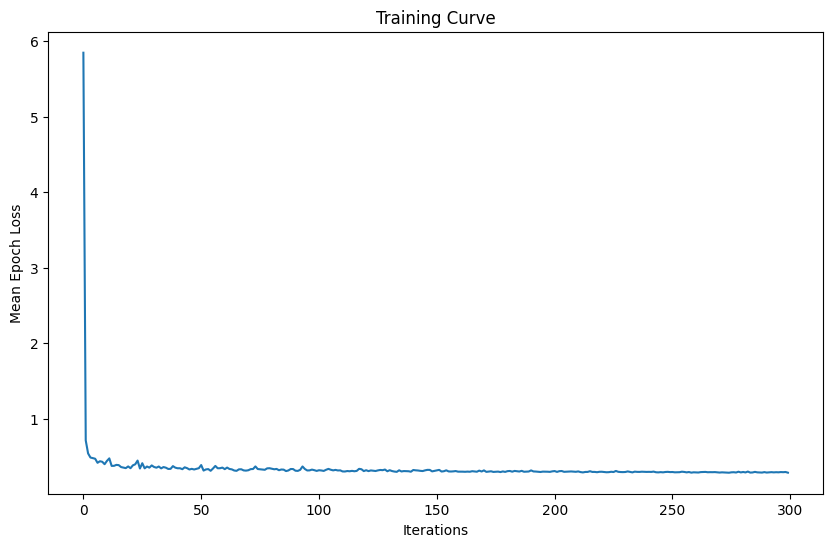

In [48]:
plt.figure(figsize=(10, 6))
plt.title("Training Curve")
plt.plot(iters, losses)
plt.xlabel("Iterations")
plt.ylabel("Mean Epoch Loss")

In [49]:
df_test_origin = pd.read_csv("test_data.csv")
df_test_origin.head()
df = df_test_origin.copy()

In [50]:
categorical_columns = []
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        categorical_columns.append(label)
categorical_values = pd.get_dummies(df[categorical_columns])
categorical_values.head()

,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,HeatingType_central_heating,HeatingType_individual_heating,AptManageType_management_in_trust,AptManageType_self_management,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,...,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,False,True,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,True,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,True,False,False,True,True,False,True,False,False,...,True,False,True,False,False,False,False,False,False,False
4,False,False,True,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [51]:
df.drop(columns=categorical_columns, inplace=True)
df.head()

,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_manager,N_elevators,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,1993,914,10,523.0,536.0,8.0,20.0,4,14.0,17.0
1,2014,907,16,90.0,1174.0,7.0,20.0,9,14.0,17.0
2,2007,1629,7,7.0,605.0,5.0,5.0,5,9.0,5.0
3,2005,743,21,67.0,798.0,6.0,0.0,7,13.0,15.0
4,2006,903,7,123.0,181.0,3.0,11.0,4,8.0,11.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearBuilt                  1767 non-null   int64  
 1   Size(sqf)                  1767 non-null   int64  
 2   Floor                      1767 non-null   int64  
 3   N_Parkinglot(Ground)       1767 non-null   float64
 4   N_Parkinglot(Basement)     1767 non-null   float64
 5   N_manager                  1767 non-null   float64
 6   N_elevators                1767 non-null   float64
 7   N_FacilitiesInApt          1767 non-null   int64  
 8   N_FacilitiesNearBy(Total)  1767 non-null   float64
 9   N_SchoolNearBy(Total)      1767 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 138.2 KB


In [53]:
categorical_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   HallwayType_corridor                 1767 non-null   bool 
 1   HallwayType_mixed                    1767 non-null   bool 
 2   HallwayType_terraced                 1767 non-null   bool 
 3   HeatingType_central_heating          1767 non-null   bool 
 4   HeatingType_individual_heating       1767 non-null   bool 
 5   AptManageType_management_in_trust    1767 non-null   bool 
 6   AptManageType_self_management        1767 non-null   bool 
 7   TimeToBusStop_0~5min                 1767 non-null   bool 
 8   TimeToBusStop_10min~15min            1767 non-null   bool 
 9   TimeToBusStop_5min~10min             1767 non-null   bool 
 10  TimeToSubway_0-5min                  1767 non-null   bool 
 11  TimeToSubway_10min~15min             1767 non-null   boo

In [54]:
test_num_data = torch.from_numpy(df.values).float()
test_cat_data = torch.from_numpy(categorical_values.values).float()

test_dataset = data.TensorDataset(test_num_data, test_cat_data)
test_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False)

In [63]:
model.eval()
ans = []

for t, t_cat in test_loader:
    t, t_cat = t.to(device), t_cat.to(device)
    out = model(t, t_cat)
    preds = torch.argmax(out, dim=1).item()
    ans.append(preds)


print(ans)




[1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 

In [71]:
import csv

with open("predictions.csv", 'w') as fhandle:
    writer = csv.writer(fhandle)
    for element in ans:
        writer.writerow([element])
    fhandle.close()